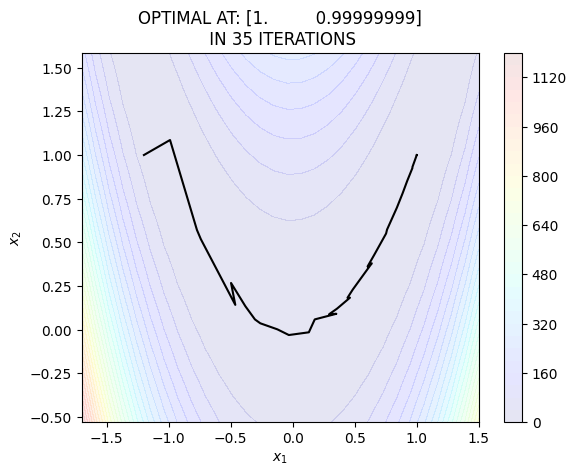

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

def f(x):
    '''
    FUNCTION TO BE OPTIMISED
    '''
    d = len(x)
    return sum(100*(x[i+1]-x[i]**2)**2 + (x[i]-1)**2 for i in range(d-1))

def grad_2(f,x): 
    '''
    CENTRAL FINITE DIFFERENCE CALCULATION
    '''
    h = np.cbrt(np.finfo(float).eps)
    d = len(x)
    nabla = np.zeros(d)
    for i in range(d): 
        x_for = np.copy(x) 
        x_back = np.copy(x)
        x_for[i] += h 
        x_back[i] -= h 
        nabla[i] = (f(x_for) - f(x_back))/(2*h) 
    return nabla 

def grad(f, x):
    d = len(x)
    nabla = np.zeros(d)
    for i in range(d):
        if i == 0:
            nabla[i] = -400 * x[0] * (x[1] - x[0]**2) + 2 * (x[0] - 1)
        elif i == d - 1:
            nabla[i] = 200 * (x[d - 1] - x[d - 2]**2)
        else:
            nabla[i] = (-400 * x[i] * (x[i+1] - x[i]**2) +
                       2 * (x[i] - 1) +
                       200 * (x[i] - x[i-1]**2))
    return nabla


def line_search(f, x, p, nabla):
    '''
    BACKTRACK LINE SEARCH WITH WOLFE CONDITIONS
    '''
    a = 1
    c1 = 1e-4 
    c2 = 0.9 
    fx = f(x)
    x_new = x + a * p 
    nabla_new = grad(f,x_new)
    while f(x_new) >= fx + (c1*a*nabla.T@p) or nabla_new.T@p <= c2*nabla.T@p : 
        a *= 0.5
        x_new = x + a * p 
        nabla_new = grad(f,x_new)
    return a


def BFGS(f, x0, max_it, eps=1e-5, plot=False):
    '''
    DESCRIPTION
    BFGS Quasi-Newton Method, implemented as described in Nocedal:
    Numerical Optimisation.


    INPUTS:
    f:      function to be optimised 
    x0:     intial guess
    max_it: maximum iterations 
    plot:   if the problem is 2 dimensional, returns 
            a trajectory plot of the optimisation scheme.

    OUTPUTS: 
    x:      the optimal solution of the function f 

    '''
    # Initialization
    d = len(x0) # dimension of problem 
    nabla = grad(f, x0) # initial gradient 
    H = np.eye(d) # initial hessian
    x = x0[:]

    it = 1

    # Store x values for plotting
    if plot == True: 
        if d == 2: 
            x_store =  np.zeros((1,2)) # storing x values 
            x_store[0,:] = x 
        else: 
            print('Too many dimensions to produce trajectory plot!')
            plot = False

    # Check if gradient norm is larger than tolerance epsilon
    while np.linalg.norm(nabla) > eps: 
        if it > max_it: 
            print('Maximum iterations reached!')
            break
        # Update iteration count
        it += 1
        # Compute search direction
        p = -H @ nabla
        # Compute step length alpha using line search
        alpha = line_search(f , x, p, nabla) 

        # Compute s_k
        s = alpha * p
        # Update x_k+1
        x_new = x + alpha * p
        # Compute y_k+1
        nabla_new = grad(f, x_new)
        y = nabla_new - nabla
        # Update H_k+1 using BFGS formula
        y = np.array([y])
        s = np.array([s])
        y = np.reshape(y, (d, 1))
        s = np.reshape(s, (d, 1))

        r = 1/(y.T@s)
        li = (np.eye(d)-(r*((s@(y.T)))))
        ri = (np.eye(d)-(r*((y@(s.T)))))

        # Update Hessian
        hess_inter = li@H@ri
        H = hess_inter + (r*((s@(s.T)))) 
        nabla = nabla_new[:]
        x = x_new[:]

        if plot == True:
            x_store = np.append(x_store,[x],axis=0) # storing x

    if plot == True:
        x1 = np.linspace(min(x_store[:,0]-0.5),max(x_store[:,0]+0.5),30)
        x2 = np.linspace(min(x_store[:,1]-0.5),max(x_store[:,1]+0.5),30)
        X1,X2 = np.meshgrid(x1,x2)
        Z = f([X1,X2])
        plt.figure()
        plt.title('OPTIMAL AT: '+str(x_store[-1,:])+'\n IN '+str(len(x_store))+' ITERATIONS')
        plt.contourf(X1,X2,Z,30,cmap='jet',alpha=0.1)
        plt.colorbar()
        plt.plot(x_store[:,0],x_store[:,1],c='black')
        plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
        plt.show()
    return x


x_opt = BFGS(f, [-1.2, 1], 100, plot=True)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

def f(x):
    '''
    FUNCTION TO BE OPTIMISED
    '''
    d = len(x)
    return sum(100*(x[i+1]-x[i]**2)**2 + (x[i]-1)**2 for i in range(d-1))

def grad_2(f,x): 
    '''
    CENTRAL FINITE DIFFERENCE CALCULATION
    '''
    h = np.cbrt(np.finfo(float).eps)
    d = len(x)
    nabla = np.zeros(d)
    for i in range(d): 
        x_for = np.copy(x) 
        x_back = np.copy(x)
        x_for[i] += h 
        x_back[i] -= h 
        nabla[i] = (f(x_for) - f(x_back))/(2*h) 
    return nabla 

def grad(f, x):
    d = len(x)
    nabla = np.zeros(d)
    for i in range(d):
        if i == 0:
            nabla[i] = -400 * x[0] * (x[1] - x[0]**2) + 2 * (x[0] - 1)
        elif i == d - 1:
            nabla[i] = 200 * (x[d - 1] - x[d - 2]**2)
        else:
            nabla[i] = (-400 * x[i] * (x[i+1] - x[i]**2) +
                       2 * (x[i] - 1) +
                       200 * (x[i] - x[i-1]**2))
    return nabla


def line_search(f, x, p, nabla):
    '''
    BACKTRACK LINE SEARCH WITH WOLFE CONDITIONS
    '''
    a = 1
    c1 = 1e-4 
    c2 = 0.9 
    fx = f(x)
    x_new = x + a * p 
    nabla_new = grad(f,x_new)
    while f(x_new) >= fx + (c1*a*nabla.T@p) or nabla_new.T@p <= c2*nabla.T@p : 
        a *= 0.5
        x_new = x + a * p 
        nabla_new = grad(f,x_new)
    return a


def bfgs(f, x0, max_it, eps=1e-5):
    # Initialization
    d = len(x0) # dimension of problem 
    nabla = grad(f, x0) # initial gradient 
    H = np.eye(d) # initial hessian
    x = x0[:]

    it = 1
    # Check if gradient norm is larger than tolerance epsilon
    while np.linalg.norm(nabla) > eps: 
        if it > max_it: 
            break
        # Compute search direction
        p = -H @ nabla
        # Compute step length alpha using line search
        alpha = line_search(f , x, p, nabla) 

        # Compute s_k
        s = alpha * p
        # Update x_k+1
        x_new = x + alpha * p
        # Compute y_k+1
        nabla_new = grad(f, x_new)
        y = nabla_new - nabla
        # Update H_k+1 using BFGS formula
        y = np.array([y])
        s = np.array([s])
        y = np.reshape(y, (d, 1))
        s = np.reshape(s, (d, 1))

        r = 1/(y.T@s)
        li = (np.eye(d)-(r*((s@(y.T)))))
        ri = (np.eye(d)-(r*((y@(s.T)))))

        # Update Hessian
        hess_inter = li@H@ri
        H = hess_inter + (r*((s@(s.T)))) 

        nabla = nabla_new[:]
        x = x_new[:]

        # Update iteration count
        it += 1

    return x

x_opt = bfgs(f, [-1.2, 1], 100)
x_opt

array([1.        , 0.99999999])

In [26]:
def bfgs(f, x_init, max_iter, eps=1e-5):
    dim = len(x_init)
    grad_current = grad(f, x_init)
    H_inv = np.eye(dim)
    x_current = x_init.copy()
    iteration = 1

    x_history = [x_current.copy()]

    while np.linalg.norm(grad_current) > eps:
        if iteration > max_iter:
            break

        # Compute search direction
        p = -H_inv @ grad_current

        # Line search for step length
        alpha = line_search(f, x_current, p, grad_current)

        # Step and update
        step_vector = alpha * p
        x_next = x_current + step_vector

        # Compute new gradient and y vector
        grad_next = grad(f, x_next)
        y_vector = grad_next - grad_current

        # Reshape for matrix math
        s = step_vector.reshape(-1, 1)
        y = y_vector.reshape(-1, 1)

        # BFGS update
        rho = 1.0 / (y.T @ s)
        identity = np.eye(dim)
        V = identity - rho * s @ y.T
        H_inv = V @ H_inv @ V.T + rho * s @ s.T

        # Update for next iteration
        x_current = x_next
        grad_current = grad_next

        x_history.append(x_current.copy())
        iteration += 1

    return x_current, np.array(x_history)

x0 = np.array([-1.2, 1])
max_iter = 100
eps = 1e-5
x_opt, x_steps = bfgs(f, x0, max_iter, eps)
print("Optimal solution:", x_opt)

Optimal solution: [1.         0.99999999]


In [ ]:
# save x_steps as file
# np.save("bfgs_steps.npy", x_steps)

# load x_steps from file
# x_steps = np.load("bfgs_steps.npy")

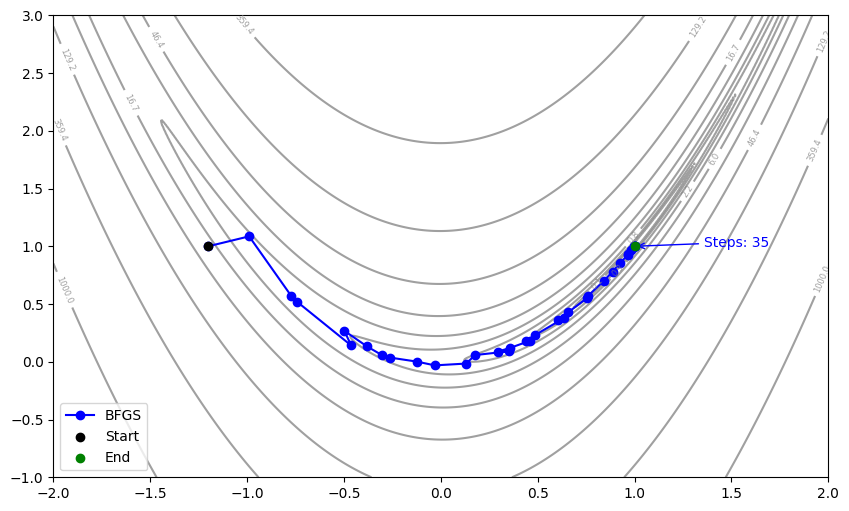

In [25]:
from scipy.optimize import rosen
# --- Plot contour and path ---
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosen(np.array([X, Y]))

plt.figure(figsize=(10, 6))
# Contour plot of Rosenbrock (grey contour lines)
cp = plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 10), colors='grey', alpha=0.75)
plt.clabel(cp, inline=True, fontsize=6)

# Optimization path
x_points = x_steps[:, 0]
y_points = x_steps[:, 1]
plt.plot(x_points, y_points, 'o-', color='blue', label='BFGS')
plt.scatter(x_points[0], y_points[0], color='black', label='Start', zorder=5)
plt.scatter(x_points[-1], y_points[-1], color='green', label='End', zorder=5)

num_steps = len(x_steps)
plt.annotate(f'Steps: {num_steps}', xy=(x_points[-1], y_points[-1]), xytext=(50, 0),
             textcoords='offset points', fontsize=10, color='blue',
             arrowprops=dict(arrowstyle='->', color='blue'))

# plt.title('BFGS Optimization Path on Rosenbrock Function')
# plt.xlabel('x')
# plt.ylabel('y')
plt.legend(loc='lower left')
# plt.grid(True)
plt.show()